The purpose of this exercise is to familiar you with the basic structure of code for q-learning. We use the taxi environment from open-ai's gym for this demo, as an exercise you will be asked to perform this exercise for the open-ai cartpole environment later.

In [1]:
import gym
env = gym.make("Taxi-v3",render_mode='ansi')
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




When the Taxi environment is created, an initial Reward table that's also created by gym, called `P` <br>
P - {action: [(probability, nextstate, reward, done)]}

In [2]:
env.P[19]

{0: [(1.0, 119, -1, False)],
 1: [(1.0, 19, -1, False)],
 2: [(1.0, 39, -1, False)],
 3: [(1.0, 19, -1, False)],
 4: [(1.0, 19, -10, False)],
 5: [(1.0, 3, -1, False)]}

In [4]:
env.reset() # reset environment to a new, random state
print(env.render())

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Action Space Discrete(6)
State Space Discrete(500)


The following is a code which iterates through the game environment without any q_learning, note the number of steps taken and the penalties.

In [3]:
env.reset()

steps = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info, _ = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    steps += 1
    
    
print("Timesteps taken: {}".format(steps))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 3441
Penalties incurred: 1121


/home/ssddevavrat/anaconda3/envs/ML_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


A function to show the animation of the agent moving in the environment:

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

We now begin our implementation for the q-learning algorithm

First, we create a q_table for our state, action pairs

In [4]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [5]:
import random

alpha = 0.1
gamma = 0.6
epsilon = 0.1

all_steps = []
all_penalties = []

for i in range(1, 1001):
    state = env.reset()

    steps, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore 
        else:
            action = np.argmax(q_table[state[0]]) # Exploit 

        next_state, reward, done, info, _ = env.step(action) 

        old_value = q_table[state[0], action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1-alpha)*old_value + alpha*(reward+gamma*next_max)
        q_table[state[0], action] = new_value

        if reward == -10:
            penalties += 1

        state = (next_state, state[1])
        steps += 1
    
    all_steps.append(steps)
    all_penalties.append(penalties)

    if i % 100 == 0:
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Training finished.



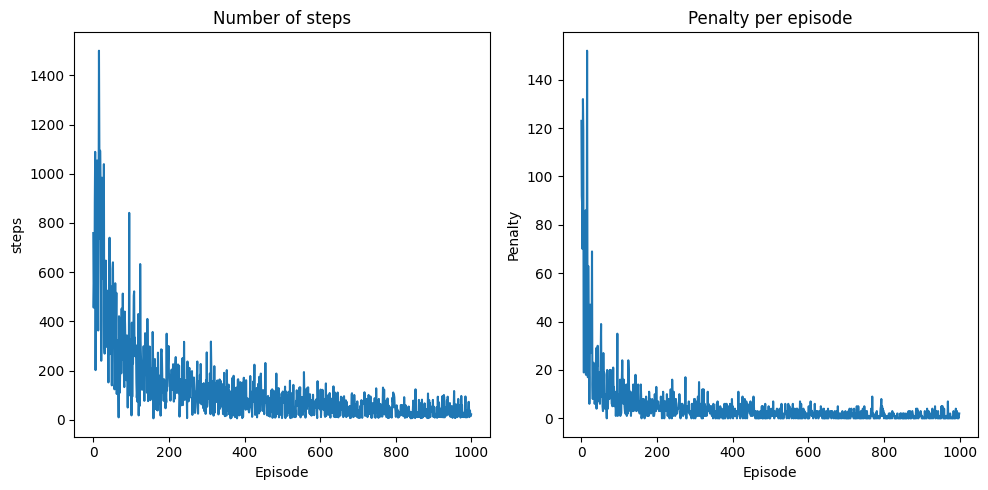

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(all_steps)
plt.title('Number of steps')
plt.xlabel('Episode')
plt.ylabel('steps')

plt.subplot(1, 2, 2)
plt.plot(all_penalties)
plt.title('Penalty per episode')
plt.xlabel('Episode')
plt.ylabel('Penalty')

plt.tight_layout()
plt.show()

env.close()